# Klasyfikacja tweetów Elona Muska

### Projekt realizuje grupa:

*  Wiktor Bajor **249459**
*  Adam Kubiak **249480**


### Opis wykonywanego zadania: 

&nbsp; W ramach projektu grupa będzie realizować zadanie klasyfikacji binarnej tweetów Elona Muska. Wykonywane zadanie będzie opierać się o zebranie tweetów sławnych ludzi, takich jak politycy, przedsiębiorcy, sportowcy, celebryci, influencerzy oraz Elon Musk. 
Akwizycja danych będzie realizowana poprzez publiczny interfejs programowania aplikacji (API), udostępniony przez Twitter.  Przy czym możliwa ilość tweetów do pobrania to pięćset tysięcy, co powinno być wystarczającą ilością danych. Dzięki udostępnionemu API można uzyskać dostęp do takich danych jak, treść publikacji, godzina publikacji, lokalizacja, ilość polubień czy ilość retweetów. Po ukończeniu etapu akwizycji danych kolejnym zadaniem, będzie przeanalizowanie tweetów, mając na uwadze takie elementy jak ilość retweetów, ilość polubień, występowanie pewnych słów kluczowych czy też sentyment umieszczonego tekstu. Na podstawie dokonanej analizy zostaną wybrane najbardziej charakterystyczne cechy tweetów Elona Muska. Ostatnim elementem projektu będzie utworzenie i wytrenowanie (na bazie wcześniej wybranych najbardziej istotny cech) klasyfikatora, który będzie oceniał czy dany tweet był napisany przez Elona Muska czy też nie. Wykonana analiza oraz klasyfikator mogłyby zostać wykorzystane do stworzenia cyfrowego sobowtóra Elona Muska. 

In [53]:
import tweepy
import configparser
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt


def get_all_access_configs():
    config = configparser.RawConfigParser()
    config.read('config.ini')
    config = config['twitter']

    return config.values()

_, _, _, _, bearer_token = get_all_access_configs()

client = tweepy.Client(bearer_token)

In [54]:
user = 'elonmusk'
id = client.get_user(username=user)


all_tweets = []
paginator = tweepy.Paginator(
    client.get_users_tweets,
    str(id.data.id),
    exclude=['retweets', 'replies'],
    tweet_fields=['id', 'created_at', 'public_metrics', 'text'])

all_tweets = [ tweet for tweet in paginator.flatten()]

In [50]:

def clean_tweet(tweet):
    return re.sub(r"http\S+", "", tweet)

def get_tweet_sentiment(tweet):  
        analysis = TextBlob(clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [57]:
outtweets = [[tweet.id, 
              tweet.created_at, 
              tweet.public_metrics['retweet_count'], 
              tweet.public_metrics['like_count'], 
              clean_tweet(tweet.text),
              get_tweet_sentiment(tweet.text)] 
             for idx,tweet in enumerate(all_tweets)]
df = pd.DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text","sentiment"])
df.to_csv('user_data/%s_tweets.csv' % user,index=False)
df.head(len(outtweets))

,id,created_at,favorite_count,retweet_count,text,sentiment
0,1586149451348910081,2022-10-29 00:14:33+00:00,13979,143168,"To be super clear, we have not yet made any ch...",positive
1,1586108809772089345,2022-10-28 21:33:03+00:00,44391,438212,Ligma Johnson had it coming 🍆 💦,neutral
2,1586104694421659648,2022-10-28 21:16:42+00:00,182466,1574650,Comedy is now legal on Twitter,positive
3,1586059953311137792,2022-10-28 18:18:55+00:00,53616,505827,Twitter will be forming a content moderation c...,negative
4,1585966869122457600,2022-10-28 12:09:02+00:00,89472,918204,🎶 let the good times roll 🎶,positive
...,...,...,...,...,...,...
701,1486850549928579075,2022-01-27 23:56:10+00:00,33019,195882,And in the darkness bind them,neutral
702,1486846468887560201,2022-01-27 23:39:57+00:00,119795,543361,"If you scare people enough, they will demand r...",neutral
703,1486827458632503297,2022-01-27 22:24:24+00:00,32803,262134,Seems odd that the UN still hasn’t released 20...,negative
704,1486806256027422730,2022-01-27 21:00:09+00:00,11304,113412,CB radios are free from govt/media control,positive


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


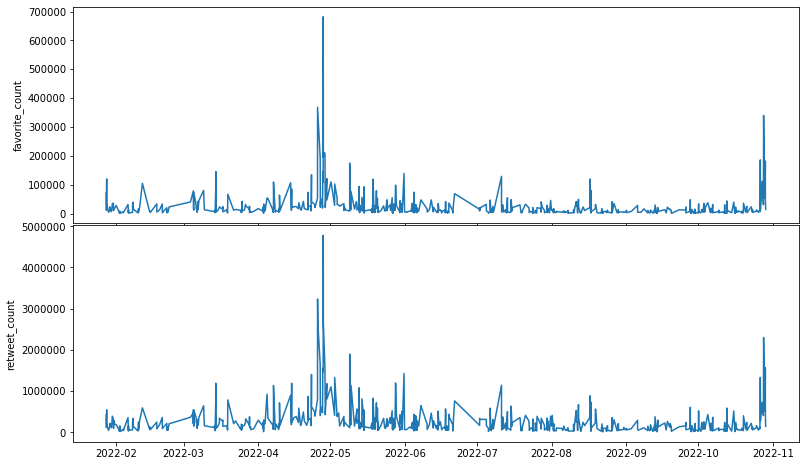

In [52]:
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,8))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()